# Modelo de regresión lineal 3

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from regressors import stats

# Estilos
sns.set(style='whitegrid')

## Preprocesamiento y entrenamiento
* Sin Country y Year y solo con las variables de mejor p-value del modelo 1

In [ ]:
# Selección de columnas
df = pd.read_csv('../datos/procesados/procesado_life_expectancy.csv')
df = df[['Life expectancy', 'Adult Mortality', 'infant deaths', 'percentage expenditure', 'under-five deaths', 'HIV/AIDS']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Life expectancy         2912 non-null   float64
 1   Adult Mortality         2912 non-null   float64
 2   infant deaths           2912 non-null   int64  
 3   percentage expenditure  2912 non-null   float64
 4   under-five deaths       2912 non-null   int64  
 5   HIV/AIDS                2912 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 136.6 KB


In [3]:
# se selecciona la variable objetivo y los predictores
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']
X_cols = X.columns

# Se instancia el Scaler
scaler = StandardScaler()

# Se dividen los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se escalan los datos y se convierten en df
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [4]:
# Instanciar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

## Métricas

In [5]:
# R² (Coeficiente de Determinación) Entre cero y uno, por encima de 0.7 puede llegar a ser un buen aceptable
r2 = round(r2_score(y_test, y_pred),3)

# Error Cuadrático Medio - Está en unidades cuadradas de la variable objetivo
mse = round(mean_squared_error(y_test, y_pred),3)

# Raiz del MSE (RMSE) - Está en las mismas unidades de la variable objetivo, entre más bajo mejor
rmse = round((mse ** 0.5), 3)

# Error relativo promedio - Menor al 10% Excelente, entre 11% y 20% Bueno, por encima de 30% necesita ajustes
error_relativo = round((rmse / df['Life expectancy'].mean() *100),3)

# Error absoluto medio (MAE) - Debe ser bajo en relación al rango de la variable objetivo
mae = round(mean_absolute_error(y_pred, y_test), 3)

In [6]:
# Resumen
stats.summary(modelo, X_test, y_test, X_cols)

Residuals:
     Min      1Q  Median     3Q   Max
-22.3694 -3.0901 -0.6323 3.5445 22.77


Coefficients:
                         Estimate  Std. Error   t value  p value
_intercept              69.406269    0.241751  287.0986      0.0
Adult Mortality         -4.441698    0.267756  -16.5886      0.0
infant deaths           21.048284    2.032012   10.3583      0.0
percentage expenditure   2.105992    0.247853    8.4969      0.0
under-five deaths      -22.414750    2.039750  -10.9890      0.0
HIV/AIDS                -2.357420    0.261794   -9.0049      0.0
---
R-squared:  0.61744,    Adjusted R-squared:  0.61413
F-statistic: 186.25 on 5 features


In [8]:
print('r2:', r2) # Por encima del 75 es un buen modelo, por encima de 85 es un excelente modelo, por encima de 90 es un modelo perfecto
print('mse:', mse) # Evalua el modelo entre 3 y -3
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse} en unidades de la variablre objetivo")
print(f'Error relativo promedio: {error_relativo}')
print(f'MAE: {mae}')

r2: 0.617
mse: 34.072
Raíz del Error Cuadrático Medio (RMSE): 5.837 en unidades de la variablre objetivo
Error relativo promedio: 8.419
MAE: 4.293


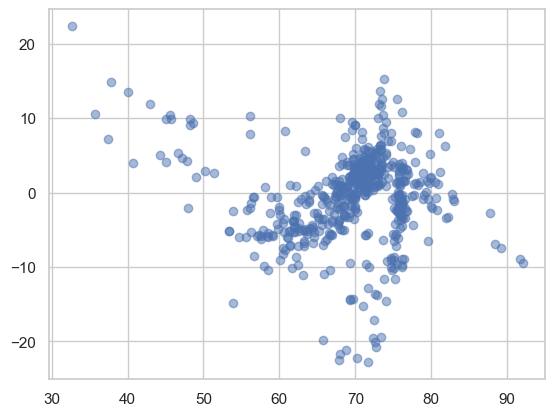

In [9]:
# Gráfico de residuales
residuales = np.subtract(y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()